<a href="https://colab.research.google.com/github/shikhaup/Deep-Learning-/blob/master/orangeDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy==1.2.1

     |████████████████████████████████| 24.8MB 89kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.2
    Uninstalling scipy-1.3.2:
      Successfully uninstalled scipy-1.3.2


In [ ]:
import os 
print("Operating System Used is:")
print(os.name) 
if __name__ == "__main__": 
    for (root,dirs,files) in os.walk('/content/drive/My Drive/Plant Village/Orange/', topdown=True): 
        print(root) 
        print(dirs) 
        #print files 
        print ('--------------------------------')

Operating System Used is:
posix
/content/drive/My Drive/Plant Village/Orange/
['Orange_Early_blight', 'Orange__Target_Spot', 'Orange__Orange_mosaic_virus', 'Orange__Orange_YellowLeaf__Curl_Virus', 'Orange_Bacterial_spot', 'Orange_healthy', 'Orange_Late_blight', 'Orange_Leaf_Mold', 'Orange_Septoria_leaf_spot', 'Orange_Spider_mites_Two_spotted_spider_mite']
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange_Early_blight
[]
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange__Target_Spot
[]
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange__Orange_mosaic_virus
[]
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange__Orange_YellowLeaf__Curl_Virus
[]
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange_Bacterial_spot
[]
--------------------------------
/content/drive/My Drive/Plant Village/Orange/Orange_healthy
[]
-------------

In [ ]:
import os
import numpy as np
from scipy.misc.pilutil import imread,imresize


count = -2
train_labels = []
train_images = []
for root, dirs, files in os.walk("/content/drive/My Drive/Plant Village/Orange/"):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))        
    count = count + 1
    for file in files:
        img = imresize(imread("/content/drive/My Drive/Plant Village/Orange/"+os.path.basename(root)+'/'+file, mode='RGB'), (60, 60)).astype(np.float32)
        #img[:, :, 0] -= 123.68
        #img[:, :, 1] -= 116.779
        #img[:, :, 2] -= 103.939
        #img[:,:,[0,1,2]] = img[:,:,[2,1,0]]
        #img = img.transpose((2, 0, 1))
        #img = np.expand_dims(img, axis=0)
        train_images.append(img)
        train_labels.append(count)
        print(len(path) * '---', file)
print(len(train_images))
print(len(train_labels))
print(train_labels)
np.save('train_images_lenet.npy',np.array(train_images))
np.save('train_labels_lenet.npy',np.array(train_labels))

------------------ 
------------------ Orange_Early_blight


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


--------------------- 0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG
--------------------- 0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG
--------------------- 00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG
--------------------- 0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG
--------------------- 00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG
--------------------- 004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG
--------------------- 01f87f04-ff38-4aba-b7d1-587aa06e5282___RS_Erly.B 7851.JPG
--------------------- 011aa278-a39e-40b0-b6e4-2e2f835889f0___RS_Erly.B 8251.JPG
--------------------- 01861c93-ea8b-4820-aaa8-cc6003b3e75b___RS_Erly.B 7855.JPG
--------------------- 0208ed52-1b28-4c9c-88e3-4667581e1109___RS_Erly.B 7829.JPG
--------------------- 023fe2d4-6e1d-40ce-99ae-85ba90f436ff___RS_Erly.B 6354.JPG
--------------------- 0378db62-5231-4eff-815d-c0deb0043e80___RS_Erly.B 7464.JPG
--------------------- 03b7a13c-f5c0-44c4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
import keras
from keras import regularizers, optimizers
from keras.layers import Conv2D,Input,Dense,MaxPooling2D,BatchNormalization,ZeroPadding2D,Flatten,Dropout
from keras.models import Model
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from scipy.misc.pilutil import imread,imresize
from numpy.random import permutation

In [ ]:
def le_net():
    model = Sequential()
    # first set of CONV => RELU => POOL
    model.add(Convolution2D(20, 5, 5, border_mode="same",
    input_shape=(60, 60, 3)))
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

    # second set of CONV => RELU => POOL
    model.add(Convolution2D(50, 5, 5, border_mode="same"))
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

    # set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Dropout(0.2))
    model.add(Activation("relu"))
 
    # softmax classifier
    model.add(Dense(10))
    model.add(Dropout(0.2))
    model.add(Activation("softmax"))
        
    return model

In [ ]:
model = le_net()
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 20)        1520      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60, 20)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 60, 60, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 50)        25050     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 50)        0         


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), input_shape=(60, 60, 3..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (5, 5), padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
train_images = np.load('train_images_lenet.npy')
train_labels = np.load('train_labels_lenet.npy')

In [ ]:
lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1), cooldown=0, patience=2, min_lr=0.5e-6)
csv_logger = CSVLogger('Lenet.csv')
early_stopper = EarlyStopping(min_delta=0.001,patience=2)
model_checkpoint = ModelCheckpoint('Lenet.hdf5',monitor = 'val_loss', verbose = 1,save_best_only=True)

In [ ]:
# Test pretrained model
train_images = np.array(train_images)
train_labels = np.array(train_labels)
mean = np.mean(train_images,axis=(0,1,2,3))
std = np.std(train_images,axis=(0,1,2,3))
train_images = (train_images-mean)/(std+1e-7)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels,num_classes)

In [ ]:
perm = permutation(len(train_images))
train_images = train_images[perm]
train_labels = train_labels[perm]
val_images = train_images[1:4800]
val_labels = train_labels[1:4800]
new_train= train_images[4800:]
new_labels = train_labels[4800:]

In [ ]:
model.compile(loss='categorical_crossentropy',
        optimizer="Adam",
        metrics=['accuracy'])

In [ ]:
#This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    
datagen.fit(new_train)
model.fit_generator(datagen.flow(new_train, new_labels, batch_size=12),
                        steps_per_epoch=new_train.shape[0] // 12,
                        epochs=10,verbose=1,validation_data=(val_images,val_labels))

Epoch 1/10
936/936 [==============================] - 214s 229ms/step - loss: 1.2578 - acc: 0.5583 - val_loss: 0.7934 - val_acc: 0.7662
Epoch 2/10
936/936 [==============================] - 210s 224ms/step - loss: 0.9180 - acc: 0.6666 - val_loss: 0.5477 - val_acc: 0.8383
Epoch 3/10
936/936 [==============================] - 212s 226ms/step - loss: 0.8090 - acc: 0.7063 - val_loss: 0.5537 - val_acc: 0.8285
Epoch 4/10
936/936 [==============================] - 216s 231ms/step - loss: 0.7362 - acc: 0.7218 - val_loss: 0.4338 - val_acc: 0.8637
Epoch 5/10
936/936 [==============================] - 233s 249ms/step - loss: 0.6692 - acc: 0.7485 - val_loss: 0.3769 - val_acc: 0.8796
Epoch 6/10
936/936 [==============================] - 200s 214ms/step - loss: 0.6645 - acc: 0.7455 - val_loss: 0.3676 - val_acc: 0.8825
Epoch 7/10
936/936 [==============================] - 217s 232ms/step - loss: 0.6034 - acc: 0.7616 - val_loss: 0.2746 - val_acc: 0.9087
Epoch 8/10
936/936 [============================

In [ ]:
#Training the model 
model.save_weights('lenet.h5')

In [ ]:
#Loading pre-trained weights
model.load_weights('lenet.h5')

In [ ]:
class_names = {0:'curl_virus',1:'late_blight',2:'early_blight',3:'spider_mites',4:'healthy',5:'septorial_leaf_spot',6:'target_spot',7:'mosaic_virus',8:'bacterial_spot',9:'leaf_mold'}

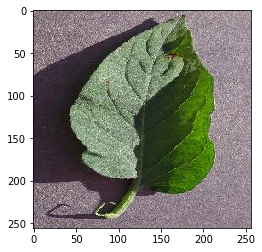

[[4.10845270e-03 9.41193283e-01 1.04119005e-02 6.63888117e-04
  3.49758397e-04 6.55669160e-03 1.49965103e-06 6.95521521e-05
  5.53240906e-03 3.11125983e-02]]
1
late_blight


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/Plant Village/Orange/Orange__Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG')
imgplot = plt.imshow(img)
plt.show()

img = imresize(imread("/content/drive/My Drive/Plant Village/Orange/Orange__Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG", mode='RGB'),(60,60)).astype(np.float32)
img = (img-mean)/(std+1e-7)
img = np.expand_dims(img, axis=0)
out = model.predict(img) 
print(out)
print (np.argmax(out))
print(class_names[np.argmax(out)])

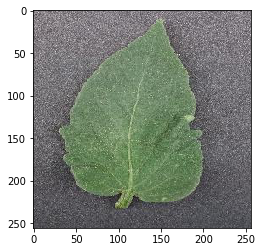

[[1.0239135e-15 1.4389664e-17 1.1387680e-24 5.0435067e-18 4.1714424e-13
  1.0000000e+00 2.8065362e-13 4.0571058e-17 2.9611151e-18 6.5346329e-17]]
5
septorial_leaf_spot


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/My Drive/Plant Village/TestDatasets/Orange_healthy/0b330273-890c-4995-af72-cba070fc0061___GH_HL Leaf 312.JPG')
imgplot = plt.imshow(img)
plt.show()
img = imresize(imread("/content/drive/My Drive/Plant Village/TestDatasets/Orange_healthy/0b330273-890c-4995-af72-cba070fc0061___GH_HL Leaf 312.JPG", mode='RGB'),(60,60)).astype(np.float32)
img = (img-mean)/(std+1e-7)
img = np.expand_dims(img, axis=0)
out = model.predict(img) 
print (out)
print (np.argmax(out))
print(class_names[np.argmax(out)])

In [ ]:
labels = np.load('train_labels_lenet.npy')
labels_list = list(labels) 
print(type(labels_list))
print(len(labels_list))

<class 'list'>
16034


In [ ]:
for i in range(10):
    print(str(i)+" "+str(labels_list.count(i)))

0 1000
1 1404
2 373
3 3218
4 2127
5 1583
6 1901
7 952
8 1800
9 1676


In [ ]:
model.save('lenet.h5')
model_file = drive.({'title' : 'lenet.h5'})                       
model_file.SetContentFile('lenet.h5')                       
model_file.Upload()